In [1]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

auckland_rain = pd.read_csv('../data/auckland_rain_temp_statsNZ.csv', parse_dates=['date'])
auckland_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          20819 non-null  datetime64[ns]
 1   rainfall(mm)  20819 non-null  float64       
 2   tavg          20819 non-null  float64       
 3   tmax          20819 non-null  float64       
 4   tmin          20819 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 813.4 KB


In [2]:
auckland_rain.head()

,date,rainfall(mm),tavg,tmax,tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


In [3]:
# Summary Statistics
print(auckland_rain.describe())

                      date  rainfall(mm)          tavg          tmax  \
count                20819  20819.000000  20819.000000  20819.000000   
mean   1994-07-02 00:00:00      3.017811     15.463764     19.009117   
min    1966-01-01 00:00:00      0.000000      5.000000      8.100000   
25%    1980-04-01 12:00:00      0.000000     12.600000     15.900000   
50%    1994-07-02 00:00:00      0.000000     15.400000     18.700000   
75%    2008-09-30 12:00:00      2.600000     18.400000     22.100000   
max    2022-12-31 00:00:00    161.800000     25.600000     30.500000   
std                    NaN      7.304329      3.750680      3.876209   

               tmin  
count  20819.000000  
mean      11.918176  
min       -0.300000  
25%        9.200000  
50%       12.100000  
75%       15.000000  
max       22.900000  
std        4.030235  


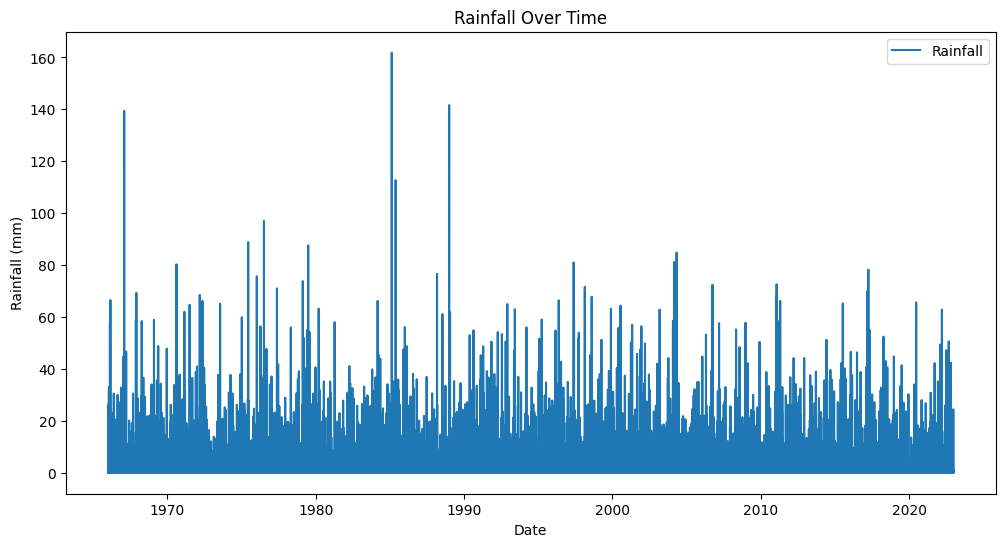

In [4]:
# Data Visualization

# Time series plot of rainfall
plt.figure(figsize=(12, 6))
plt.plot(auckland_rain['date'], auckland_rain['rainfall(mm)'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time')
plt.legend()
plt.show()

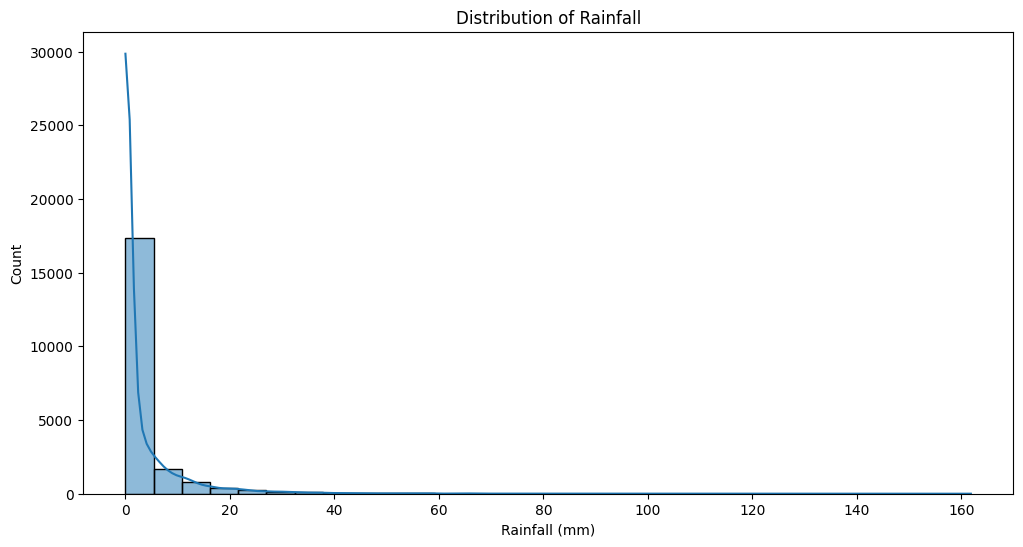

In [5]:
# Histograms
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=auckland_rain, x='rainfall(mm)', bins=30, kde=True)
plt.xlabel('Rainfall (mm)')
plt.title('Distribution of Rainfall')
plt.show()

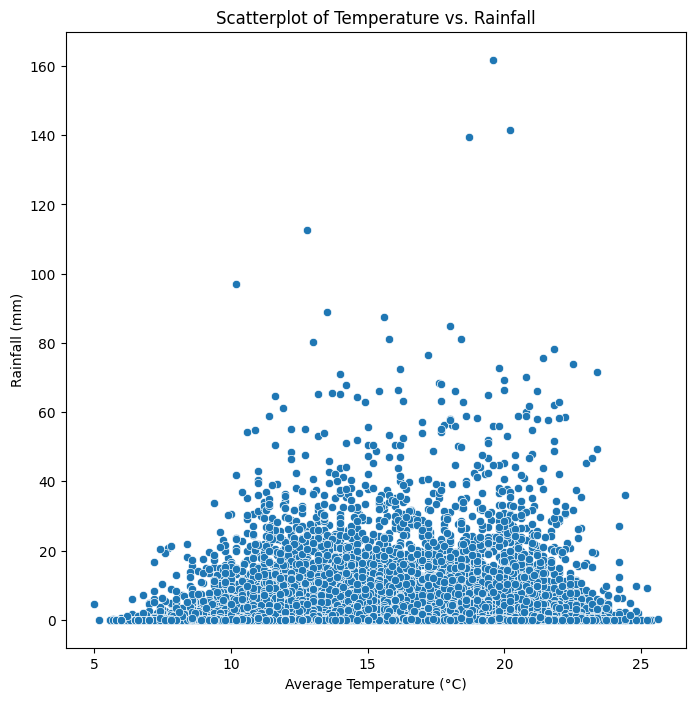

In [6]:
# Scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=auckland_rain, x='tavg', y='rainfall(mm)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatterplot of Temperature vs. Rainfall')
plt.show()

In [7]:
# Handling Missing Data
missing_data = auckland_rain.isnull().sum()
print(missing_data)

date            0
rainfall(mm)    0
tavg            0
tmax            0
tmin            0
dtype: int64


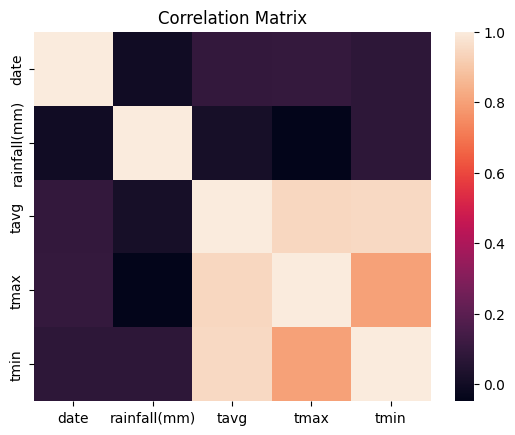

In [8]:
# Correlation Analysis
correlation_matrix = auckland_rain.corr()
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Create lag features for prevous 7 days of rainfall and temperature
lag_days = 7
for i in range(1, lag_days + 1):
    auckland_rain[f'nextday_rainfall{i}'] = auckland_rain['rainfall(mm)'].shift(i)
    auckland_rain[f'nextday_tavg{i}'] = auckland_rain['tavg'].shift(i)
    auckland_rain[f'nextday_tmax{i}'] = auckland_rain['tmax'].shift(i)
    auckland_rain[f'nextday_tmin{i}'] = auckland_rain['tmin'].shift(i)

# Drop rows with NaN values due to lag features
auckland_rain.dropna(inplace=True)

auckland_rain.head(10)

,date,rainfall(mm),tavg,tmax,tmin,nextday_rainfall1,nextday_tavg1,nextday_tmax1,nextday_tmin1,nextday_rainfall2,...,nextday_tmax5,nextday_tmin5,nextday_rainfall6,nextday_tavg6,nextday_tmax6,nextday_tmin6,nextday_rainfall7,nextday_tavg7,nextday_tmax7,nextday_tmin7
7,1966-01-08,1.3,19.7,22.1,17.3,5.1,20.0,23.7,16.3,8.9,...,23.5,17.1,26.2,20.5,23.9,17.1,0.0,18.0,22.2,13.9
8,1966-01-09,2.5,17.8,19.7,15.9,1.3,19.7,22.1,17.3,5.1,...,24.4,16.2,0.0,20.3,23.5,17.1,26.2,20.5,23.9,17.1
9,1966-01-10,0.0,16.2,18.0,14.4,2.5,17.8,19.7,15.9,1.3,...,23.4,17.8,0.0,20.3,24.4,16.2,0.0,20.3,23.5,17.1
10,1966-01-11,0.5,16.8,19.3,14.4,0.0,16.2,18.0,14.4,2.5,...,23.4,18.6,1.3,20.6,23.4,17.8,0.0,20.3,24.4,16.2
11,1966-01-12,0.5,18.0,20.5,15.6,0.5,16.8,19.3,14.4,0.0,...,23.7,16.3,8.9,21.0,23.4,18.6,1.3,20.6,23.4,17.8
12,1966-01-13,0.0,17.0,18.9,15.1,0.5,18.0,20.5,15.6,0.5,...,22.1,17.3,5.1,20.0,23.7,16.3,8.9,21.0,23.4,18.6
13,1966-01-14,0.5,16.8,18.7,14.9,0.0,17.0,18.9,15.1,0.5,...,19.7,15.9,1.3,19.7,22.1,17.3,5.1,20.0,23.7,16.3
14,1966-01-15,0.0,18.6,22.1,15.1,0.5,16.8,18.7,14.9,0.0,...,18.0,14.4,2.5,17.8,19.7,15.9,1.3,19.7,22.1,17.3
15,1966-01-16,0.0,18.8,24.6,12.9,0.0,18.6,22.1,15.1,0.5,...,19.3,14.4,0.0,16.2,18.0,14.4,2.5,17.8,19.7,15.9
16,1966-01-17,0.0,18.3,22.6,14.0,0.0,18.8,24.6,12.9,0.0,...,20.5,15.6,0.5,16.8,19.3,14.4,0.0,16.2,18.0,14.4


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = auckland_rain[['rainfall(mm)', 'tavg', 'tmax', 'tmin']]

# Use the lag features for X
for i in range(1, lag_days + 1):
    X = pd.concat([X, auckland_rain[[f'nextday_rainfall{i}', f'nextday_tavg{i}', f'nextday_tmax{i}', f'nextday_tmin{i}']]], axis=1)

# Define the target variable (next day's rainfall)
y = auckland_rain['nextday_rainfall1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
print(f'XGBoost RMSE: {xgb_rmse}')

c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

XGBoost RMSE: 1.2214444228899948


c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [12]:
# Predict rainfall for tomorrow using the XGBoost model
xgb_predict_tomorrow = xgb_model.predict(X_train)
xgb_predict_day_after_tomorrow = xgb_model.predict(X_train)
xgb_predict_two_days_after_tomorrow = xgb_model.predict(X_train)

# Print the predictions
print(f'Random Forest Prediction for tomorrow: {xgb_predict_tomorrow[0]} mm')
print(f'Random Forest Prediction for the day after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')
print(f'Random Forest Prediction for two days after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')

Random Forest Prediction for tomorrow: 11.023563385009766 mm
Random Forest Prediction for the day after tomorrow: 11.023563385009766 mm
Random Forest Prediction for two days after tomorrow: 11.023563385009766 mm


c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Ying\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [13]:
# Calculate monthly median rainfall
monthly_median_rainfall = auckland_rain.groupby(auckland_rain['date'].dt.month)['rainfall(mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
auckland_rain['rainfall_percentage'] = (auckland_rain['rainfall(mm)'] / monthly_median_rainfall[auckland_rain['date'].dt.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
auckland_rain['weather_condition'] = auckland_rain['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(auckland_rain[['date', 'rainfall(mm)', 'rainfall_percentage', 'weather_condition']])


            date  rainfall(mm)  rainfall_percentage weather_condition
7     1966-01-08           1.3                  inf          Very wet
8     1966-01-09           2.5                  inf          Very wet
9     1966-01-10           0.0                  NaN          Very dry
10    1966-01-11           0.5                  inf          Very wet
11    1966-01-12           0.5                  inf          Very wet
...          ...           ...                  ...               ...
20814 2022-12-27           0.0                  NaN          Very dry
20815 2022-12-28           0.0                  NaN          Very dry
20816 2022-12-29           0.0                  NaN          Very dry
20817 2022-12-30           0.0                  NaN          Very dry
20818 2022-12-31           0.8                  inf          Very wet

[20812 rows x 4 columns]
